# Import lib

In [29]:
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

# Encoder

In [30]:
def encoder_block(inputs, num_filters):
    
    # Convolution with 3x3 filter followed by ReLU activation
    x = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=3, padding='valid', activation='relu')(inputs)
    
    # Convolution with 3x3 filter followed by ReLU activation
    x = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=3, padding='valid', activation='relu')(x)
    
    # Max Pooling with 2x2 filter
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)
    
    return x

# Decoder

In [31]:
def decoder_block(inputs, skip_features, num_filters):

    # Up sampling with 2x2 filter
    x = tf.keras.layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding='valid')(inputs)
    
    # Copy and crop the skip features
    # to match the shap of the up sampled input
    resizing = tf.keras.layers.Resizing(height=x.shape[1], width=x.shape[2])
    skip_features = resizing(skip_features)
    x = tf.keras.layers.Concatenate()([x, skip_features])
    
    # Convolution with 3x3 filter followed by ReLU activation
    x = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=3, padding='valid', activation='relu')(x)
    
    # Convolution with 3x3 filter followed by ReLU activation
    x = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=3, padding='valid', activation='relu')(x)
    
    return x

# U-Net

In [32]:
def unet_model(input_shape=(256, 256, 3), num_classes=1):
    inputs = tf.keras.layers.Input(input_shape)
    
    # Contracting Path
    s1 = encoder_block(inputs, 64)
    s2 = encoder_block(s1, 128)
    s3 = encoder_block(s2, 256)
    s4 = encoder_block(s3, 512)
    
    # Bottleneck
    b1 = tf.keras.layers.Conv2D(filters=1024, kernel_size=3, padding='valid', activation='relu')(s4)
    b1 = tf.keras.layers.Conv2D(filters=1024, kernel_size=3, padding='valid', activation='relu')(b1)
    
    # Expansive Path
    s5 = decoder_block(b1, s4, 512)
    s6 = decoder_block(s5, s3, 256)
    s7 = decoder_block(s6, s2, 128)
    s8 = decoder_block(s7, s1, 64)
    
    # Output
    outputs = tf.keras.layers.Conv2D(filters=num_classes, kernel_size=1, padding='valid', activation='sigmoid')(s8)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='U-Net')
    
    return model

# Create model
![Alt Text](u-net-architecture.png)

In [33]:
model = unet_model(input_shape=(572, 572, 3), num_classes=2)
model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 572, 572,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_152 (Conv2D) │ (None, 570, 570,  │      1,792 │ input_layer_8[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_153 (Conv2D) │ (None, 568, 568,  │     36,928 │ conv2d_152[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_32    │ (None, 284, 284,  │          0 │ conv2d_153[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_154 (Conv2D) │ (None, 282, 282,  │     73,856 │ max_pooling2d_32… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_155 (Conv2D) │ (None, 280, 280,  │    147,584 │ conv2d_154[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_33    │ (None, 140, 140,  │          0 │ conv2d_155[0][0]  │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_156 (Conv2D) │ (None, 138, 138,  │    295,168 │ max_pooling2d_33… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_157 (Conv2D) │ (None, 136, 136,  │    590,080 │ conv2d_156[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_34    │ (None, 68, 68,    │          0 │ conv2d_157[0][0]  │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_158 (Conv2D) │ (None, 66, 66,    │  1,180,160 │ max_pooling2d_34… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_159 (Conv2D) │ (None, 64, 64,    │  2,359,808 │ conv2d_158[0][0]  │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_35    │ (None, 32, 32,    │          0 │ conv2d_159[0][0]  │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_160 (Conv2D) │ (None, 30, 30,    │  4,719,616 │ max_pooling2d_35… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_161 (Conv2D) │ (None, 28, 28,    │  9,438,208 │ conv2d_160[0][0]  │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_32 │ (None, 56, 56,    │  2,097,664 │ conv2d_161[0][0]  │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resizing_32         │ (None, 56, 56,    │          0 │ max_pooling2d_35

 Total params: 31,031,810 (118.38 MB)

 Trainable params: 31,031,810 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

# Apply to an image

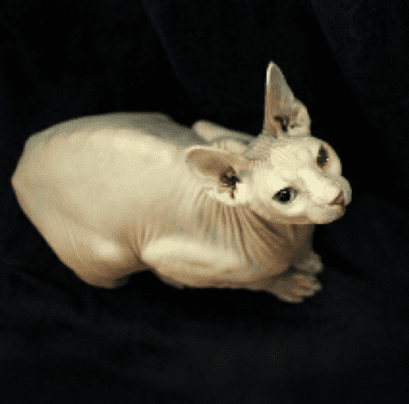

In [34]:
# Load the image 
img = Image.open('cat.png')
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


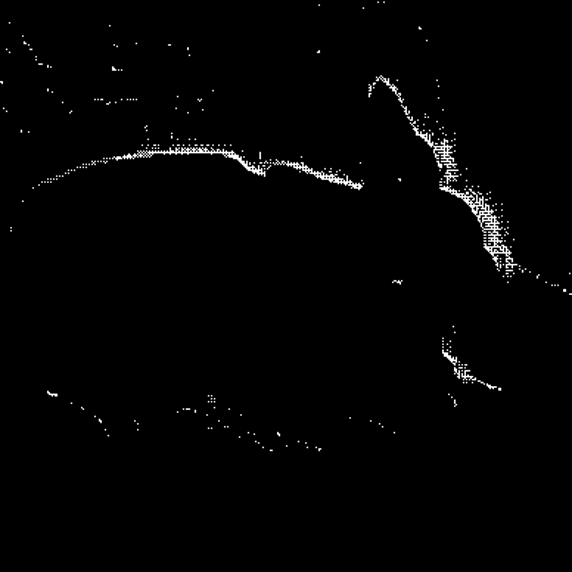

In [35]:
# Preprocess the image 
img = img.resize((572, 572)) 
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array[:,:,:3], axis=0) 
img_array = img_array / 255.
  
# Load the model 
model = unet_model(input_shape=(572, 572, 3), num_classes=2) 
  
# Make predictions 
predictions = model.predict(img_array) 
  
# Convert predictions to a numpy array and resize to original image size 
predictions = np.squeeze(predictions, axis=0) 
predictions = np.argmax(predictions, axis=-1) 
predictions = Image.fromarray(np.uint8(predictions*255)) 
predictions = predictions.resize((img.width, img.height)) 
  
# Save the predicted image 
predictions.save('predicted_image.jpg') 
predictions